In [1]:
# 나눔고딕 폰트 설치 및 설정
!apt-get update -qq
!apt-get install fonts-nanum -qq
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/nanum: skipping, looped dire

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 폰트 설정
# font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
# fontprop = fm.FontProperties(fname=font_path, size=10)
# plt.rcParams['font.family'] = 'NanumGothic'
# plt.rcParams['axes.unicode_minus'] = False

font_path='/System/Library/Fonts/AppleGothic.ttf'
fontprop = fm.FontProperties(fname=font_path, size=10)
plt.rcParams['font.family'] = 'AppleGothic'  # macOS
plt.rcParams['axes.unicode_minus'] = False
data_path = './data/geo/'

2025-07-23 16:15:12.970437: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2025-07-23 16:15:12.970463: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 18.00 GB
2025-07-23 16:15:12.970471: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 6.00 GB
2025-07-23 16:15:12.970485: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-07-23 16:15:12.970495: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


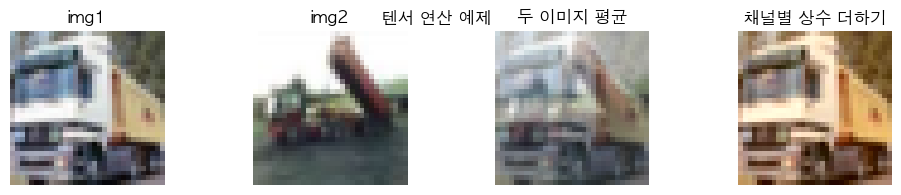

In [ ]:


# 두 장의 이미지를 불러와서 픽셀별로 평균을 내는 연산
(x_train, y_train), _ = tf.keras.datasets.cifar10.load_data()
img1 = tf.convert_to_tensor(x_train[1], dtype=tf.float32)
img2 = tf.convert_to_tensor(x_train[2], dtype=tf.float32)

# 두 이미지 합치기 (단순 평균)
img_avg = tf.cast((img1 + img2) / 2, tf.uint8)

# 한 이미지에서 각 채널별로 상수 더하기 (브로드캐스팅 예제)
bias = tf.constant([30, 0, -30], shape=[1,1,3], dtype=tf.float32)
img_biased = tf.cast(tf.clip_by_value(img1 + bias, 0, 255), tf.uint8)

plt.figure(figsize=(12,2))
plt.subplot(1,4,1)
plt.imshow(img1.numpy().astype('uint8'))
plt.title('img1')
plt.axis('off')

plt.subplot(1,4,2)
plt.imshow(img2.numpy().astype('uint8'))
plt.title('img2')
plt.axis('off')

plt.subplot(1,4,3)
plt.imshow(img_avg.numpy())
plt.title('두 이미지 평균')
plt.axis('off')

plt.subplot(1,4,4)
plt.imshow(img_biased.numpy())
plt.title('채널별 상수 더하기')
plt.axis('off')

plt.suptitle('텐서 연산 예제')
plt.show()
